In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets('./data/',one_hot=True)

W0815 21:55:37.205429 139709632542464 deprecation.py:323] From <ipython-input-2-e390a932fbea>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0815 21:55:37.209391 139709632542464 deprecation.py:323] From /home/dgc/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0815 21:55:37.215448 139709632542464 deprecation.py:323] From /home/dgc/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated a

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


W0815 21:55:39.649550 139709632542464 deprecation.py:323] From /home/dgc/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0815 21:55:39.656338 139709632542464 deprecation.py:323] From /home/dgc/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz


W0815 21:55:40.647768 139709632542464 deprecation.py:323] From /home/dgc/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [4]:
print("train data size:{}".format(mnist.train.num_examples))

train data size:55000


In [5]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
BATCH_SIZE=200
xs,ys=mnist.train.next_batch(BATCH_SIZE)
print(xs.shape)
print(ys.shape)

(200, 784)
(200, 10)


In [10]:
import tensorflow as tf

In [12]:
import numpy as np

In [19]:
BATCH_SIZE=8
seed=23455

rng = np.random.RandomState(seed)
#随机数返回32行2列矩阵，表示32行体积和重量，作为输入数据集

X=rng.rand(32,2)

#从X这个32行2列的矩阵中取出一行，如果小于1赋值Y1，or 0
#作为数据集的标签
Y=[[int(X0+X1<1)] for (X0,X1) in X]
# print(X)
# print(Y)
# 定义神经网络的输入，参数和输出，定义向前传播过程
x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a=tf.matmul(x,w1)
y=tf.matmul(a,w2)

#定义损失函数及反向传播方法
loss=tf.reduce_mean(tf.square(y-y_))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)


# 生成会话，训练STEPS轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    #输出目前未经训练的参数值。
    print(sess.run(w1))
    print(sess.run(w2))
    
    
    #训练模型
    STEPS=3000
    for i in range(STEPS):
        start=(i*BATCH_SIZE) %32
        end= start+BATCH_SIZE
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y[start:end]})
        if i% 500 ==0:
            total_loss=sess.run(loss,feed_dict={x:X,y_:Y})
            print("After {} training step(s),loss on all data is {}".format(i,total_loss))
    #输出训练后的参数值
    print(sess.run(w1))
    print(sess.run(w2))
    

[[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
[[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]
After 0 training step(s),loss on all data is 5.131181716918945
After 500 training step(s),loss on all data is 0.4291110038757324
After 1000 training step(s),loss on all data is 0.409789115190506
After 1500 training step(s),loss on all data is 0.39992278814315796
After 2000 training step(s),loss on all data is 0.39414557814598083
After 2500 training step(s),loss on all data is 0.39059656858444214
After 3000 training step(s),loss on all data is 0.3883358836174011
After 3500 training step(s),loss on all data is 0.386854887008667
After 4000 training step(s),loss on all data is 0.3858628571033478
After 4500 training step(s),loss on all data is 0.3851865231990814
After 5000 training step(s),loss on all data is 0.38471871614456177
After 5500 training step(s),loss on all data is 0.38439124822616577
After 6000 training step(s),loss on all data is 0.38415980339050293
After

After 59500 training step(s),loss on all data is 0.38356053829193115
After 60000 training step(s),loss on all data is 0.38356053829193115
After 60500 training step(s),loss on all data is 0.38356053829193115
After 61000 training step(s),loss on all data is 0.38356053829193115
After 61500 training step(s),loss on all data is 0.38356056809425354
After 62000 training step(s),loss on all data is 0.38356053829193115
After 62500 training step(s),loss on all data is 0.38356053829193115
After 63000 training step(s),loss on all data is 0.38356053829193115
After 63500 training step(s),loss on all data is 0.38356056809425354
After 64000 training step(s),loss on all data is 0.38356053829193115
After 64500 training step(s),loss on all data is 0.38356053829193115
After 65000 training step(s),loss on all data is 0.38356053829193115
After 65500 training step(s),loss on all data is 0.3835605978965759
After 66000 training step(s),loss on all data is 0.38356053829193115
After 66500 training step(s),loss o

After 119500 training step(s),loss on all data is 0.38356053829193115
After 120000 training step(s),loss on all data is 0.38356056809425354
After 120500 training step(s),loss on all data is 0.38356053829193115
After 121000 training step(s),loss on all data is 0.38356056809425354
After 121500 training step(s),loss on all data is 0.38356056809425354
After 122000 training step(s),loss on all data is 0.38356053829193115
After 122500 training step(s),loss on all data is 0.38356053829193115
After 123000 training step(s),loss on all data is 0.38356053829193115
After 123500 training step(s),loss on all data is 0.38356053829193115
After 124000 training step(s),loss on all data is 0.38356056809425354
After 124500 training step(s),loss on all data is 0.38356053829193115
After 125000 training step(s),loss on all data is 0.38356056809425354
After 125500 training step(s),loss on all data is 0.38356053829193115
After 126000 training step(s),loss on all data is 0.3835605978965759
After 126500 training

After 179500 training step(s),loss on all data is 0.38356053829193115
After 180000 training step(s),loss on all data is 0.38356056809425354
After 180500 training step(s),loss on all data is 0.38356053829193115
After 181000 training step(s),loss on all data is 0.38356056809425354
After 181500 training step(s),loss on all data is 0.38356053829193115
After 182000 training step(s),loss on all data is 0.38356053829193115
After 182500 training step(s),loss on all data is 0.38356056809425354
After 183000 training step(s),loss on all data is 0.38356053829193115
After 183500 training step(s),loss on all data is 0.38356053829193115
After 184000 training step(s),loss on all data is 0.38356053829193115
After 184500 training step(s),loss on all data is 0.38356053829193115
After 185000 training step(s),loss on all data is 0.38356053829193115
After 185500 training step(s),loss on all data is 0.38356056809425354
After 186000 training step(s),loss on all data is 0.38356053829193115
After 186500 trainin

After 239500 training step(s),loss on all data is 0.38356053829193115
After 240000 training step(s),loss on all data is 0.38356053829193115
After 240500 training step(s),loss on all data is 0.38356053829193115
After 241000 training step(s),loss on all data is 0.38356056809425354
After 241500 training step(s),loss on all data is 0.38356056809425354
After 242000 training step(s),loss on all data is 0.38356053829193115
After 242500 training step(s),loss on all data is 0.38356053829193115
After 243000 training step(s),loss on all data is 0.38356056809425354
After 243500 training step(s),loss on all data is 0.38356053829193115
After 244000 training step(s),loss on all data is 0.38356053829193115
After 244500 training step(s),loss on all data is 0.38356053829193115
After 245000 training step(s),loss on all data is 0.38356053829193115
After 245500 training step(s),loss on all data is 0.38356053829193115
After 246000 training step(s),loss on all data is 0.38356053829193115
After 246500 trainin

After 299500 training step(s),loss on all data is 0.38356056809425354
[[-0.686997    0.80430025  0.09640409]
 [-2.3437183  -0.10345024  0.5843357 ]]
[[-0.09038302]
 [ 0.80355716]
 [-0.05014525]]


# 损失函数 8 16

In [28]:
import tensorflow as tf 

w=tf.Variable(tf.constant(5,dtype=tf.float32))

loss=tf.square(w+1)

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    init_op =tf.global_variables_initializer()
    sess.run(init_op)
    for  i in range(40):
        sess.run(train_step)
        w_var = sess.run(w)
        loss_var = sess.run(loss)
        print("After {} step w is{},loss is {}".format(i,w_var,loss_var))





After 0 step w is3.799999952316284,loss is 23.040000915527344
After 1 step w is2.8399999141693115,loss is 14.745599746704102
After 2 step w is2.072000026702881,loss is 9.43718433380127
After 3 step w is1.4575999975204468,loss is 6.039798259735107
After 4 step w is0.9660799503326416,loss is 3.8654704093933105
After 5 step w is0.5728639364242554,loss is 2.4739010334014893
After 6 step w is0.2582911550998688,loss is 1.583296537399292
After 7 step w is0.0066329240798950195,loss is 1.0133098363876343
After 8 step w is-0.1946936696767807,loss is 0.6485182642936707
After 9 step w is-0.35575494170188904,loss is 0.41505166888237
After 10 step w is-0.4846039414405823,loss is 0.26563310623168945
After 11 step w is-0.5876831412315369,loss is 0.1700051873922348
After 12 step w is-0.6701465249061584,loss is 0.10880331695079803
After 13 step w is-0.7361172437667847,loss is 0.06963410973548889
After 14 step w is-0.7888938188552856,loss is 0.04456581920385361
After 15 step w is-0.8311150670051575,loss 

# 学习率 8 16

In [33]:
#指数衰减学习率

import tensorflow as tf

LEARNING_RATE_BASE=0.8

LEARNING_RATE_DECAY = 0.99

LEARNING_RATE_STEP=1

global_step = tf.Variable(0,trainable=False)

learning_rate =tf.train.exponential_decay(LEARNING_RATE_BASE,global_step,LEARNING_RATE_STEP,LEARNING_RATE_DECAY,staircase=True)

w=tf.Variable(tf.constant(5,dtype=tf.float32))

loss= tf.square(w+1)

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    for i in range(40):
        sess.run(train_step)
        learning_rate_val = sess.run(learning_rate)
        global_step_val = sess.run(global_step)
        w_val = sess.run(w)
        loss_val=sess.run(loss)
        print("After {}steps: global_step is{},w is{},learning_rate is{},loss is{}".format(i,global_step_val,w_val,learning_rate_val,loss_val))

After 0steps: global_step is1,w is-4.600000381469727,learning_rate is0.7919999957084656,loss is12.960002899169922
After 1steps: global_step is2,w is1.102400302886963,learning_rate is0.7840800285339355,loss is4.420086860656738
After 2steps: global_step is3,w is-2.194499969482422,learning_rate is0.7762392163276672,loss is1.4268301725387573
After 3steps: global_step is4,w is-0.34006452560424805,learning_rate is0.7684768438339233,loss is0.4355148375034332
After 4steps: global_step is5,w is-1.354354739189148,learning_rate is0.760792076587677,loss is0.12556728720664978
After 5steps: global_step is6,w is-0.8151741623878479,learning_rate is0.7531841993331909,loss is0.034160591661930084
After 6steps: global_step is7,w is-1.0935900211334229,learning_rate is0.7456523776054382,loss is0.0087590916082263
After 7steps: global_step is8,w is-0.954018771648407,learning_rate is0.7381958365440369,loss is0.002114273374900222
After 8steps: global_step is9,w is-1.0219050645828247,learning_rate is0.7308139204

# 滑动平均

In [35]:
import tensorflow as tf

w1=tf.Variable(0,dtype=tf.float32)

global_step = tf.Variable(0,trainable=False)

MOVING_AVERAGE_DACAY = 0.99

ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DACAY,global_step)

ema_op=ema.apply(tf.trainable_variables())

with tf.Session() as sess:
    
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    print(sess.run([w1,ema.average(w1)]))
    
    #参数w1的值赋为1
    sess.run(tf.assign(w1,1))
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    
    #更新step和w1的值，模拟出100轮迭代后，参数w1变为10
    sess.run(tf.assign(global_step,100))
    sess.run(tf.assign(w1,10))
    sess.run(ema_op)
    print(sess.run([w1,ema.average(w1)]))
    
    #每次滑动平均值会更新一次w1的滑动平均值
    for i in range(8):
        
        sess.run(ema_op)
        print(sess.run([w1,ema.average(w1)]))
#更改 MOVING_AVERAGE_DECAY 为0.1 看影子追随速度    

[0.0, 0.0]
[1.0, 0.9]
[10.0, 1.6445453]
[10.0, 2.3281732]
[10.0, 2.955868]
[10.0, 3.532206]
[10.0, 4.061389]
[10.0, 4.547275]
[10.0, 4.9934072]
[10.0, 5.4030375]
[10.0, 5.7791524]


# 正则化

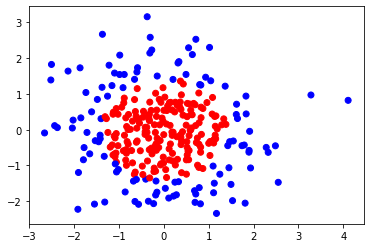

After 0steps,loss is 4.939634799957275
After 2000steps,loss is 1.171370029449463
After 4000steps,loss is 0.30664050579071045
After 6000steps,loss is 0.1343793421983719
After 8000steps,loss is 0.1014781966805458
After 10000steps,loss is 0.08782239258289337
After 12000steps,loss is 0.08007760345935822
After 14000steps,loss is 0.07679454982280731
After 16000steps,loss is 0.07511604577302933
After 18000steps,loss is 0.07369128614664078
After 20000steps,loss is 0.07257819175720215
After 22000steps,loss is 0.07185403257608414
After 24000steps,loss is 0.0712558776140213
After 26000steps,loss is 0.0707879364490509
After 28000steps,loss is 0.07052262127399445
After 30000steps,loss is 0.07007516175508499
After 32000steps,loss is 0.06963786482810974
After 34000steps,loss is 0.06938112527132034
After 36000steps,loss is 0.06919992715120316
After 38000steps,loss is 0.06904622167348862
w1:[[ 1.0030107  -0.74917054 -1.4629545   0.7169912  -0.7862252  -0.08047414
   0.06226242  0.299332    0.3762224   

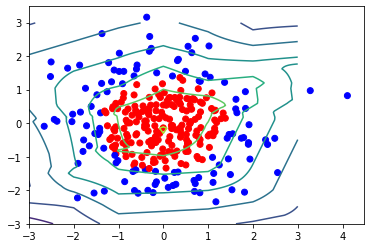

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
BATCH_SIZE=30
seed=2

rdm=np.random.RandomState(seed)

X=rdm.randn(300,2)

Y_=[int(X0*X0 +X1*X1<2) for (X0,X1) in X]

Y_c=[['red' if y else 'blue'] for y in Y_]

# print(X)
# print(Y_)
X=np.vstack(X).reshape(-1,2)
Y_=np.vstack(Y_).reshape(-1,1)
# print(X)
# print(Y_)
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.show()
#定义神经网络输入，参数和输出，定义向前传播过程

def get_weight(shape,regularizer):
    w=tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    b= tf.Variable(tf.constant(0.01,shape=shape))
    
    return b

x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=get_weight([2,11],0.01)

b1=get_bias([11])

y1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=get_weight([11,1],0.01)
b2=get_bias([1])
y=tf.matmul(y1,w2)+b2 #输出层不激活

#定义损失函数
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse+tf.add_n(tf.get_collection('losses'))


#定义反向传播方法：不含正则化

train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    STEPS=40000
    for i in range(STEPS):
        start=(i*BATCH_SIZE) % 300
        end= start+BATCH_SIZE
        
        sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
        if i % 2000 ==0:
            loss_mse_v = sess.run(loss_mse,feed_dict = {x:X,y_:Y_})
            print("After {}steps,loss is {}".format(i,loss_mse_v))
            
    xx,yy = np.mgrid[-3:3.01,-3:3:.01]
    
    grid = np.c_[xx.ravel(),yy.ravel()]
    
    probs=sess.run(y,feed_dict={x:grid})
    
    probs=probs.reshape(xx.shape)
    
    print("w1:{}".format(sess.run(w1)))
    print("b1:{}".format(sess.run(b1)))
    print("w2:{}".format(sess.run(w2)))
    print("b2:{}".format(sess.run(b2)))
    
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
# plt.contour(xx,yy,probs,levels=[.5])
plt.contour(xx,yy,probs)

plt.show()
            
        
    

# 神经网络搭建八股

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#生成实验数据

def generate():
    seed= 2
    rmd = np.random.RandomState(seed)
    X=rmd.randn(300,2)
    
    Y_=[int(X0*X0+X1*X1<2) for (X0,X1) in X]
    
    Y_c=[['red' if y else 'blue'] for y in Y_]
    
    X=np.vstack(X).reshape(-1,2)
    
    Y_ = np.vstack(Y_).reshape(-1,1)
    
    return X,Y_,Y_c
#前向传播


def get_weight(shape,regularizer):
    w=tf.Variable(tf.random_normal(shape),dtype = tf.float32)
    
    tf.add_to_collection("losses",tf.contrib.layers.l2_regularizer(regularizer)(w))
    
    return w


def get_bias(shape):
    b=tf.Variable(tf.constant(0.01,shape = shape))
    
    return b

def forward(x,regularizer):
    w1=get_weight([2,11],regularizer)
    
    b1=get_bias([11])
    
    y1=tf.nn.relu(tf.matmul(x,w1)+b1)
    
    w2=get_weight([11,1],regularizer)
    
    b2=get_bias([1])
    
    y=tf.matmul(y1,w2)+b2
    
    return y
#反向传播

#定义超参数
STEPS=40000
BATCH_SIZE=30
LEARNING_RATE_BASE=0.001
LEARNING_RATE_DECAY=0.999
REGULARIZER = 0.01



def backward():
    x=tf.placeholder(tf.float32,shape=(None,2))
    y_=tf.placeholder(tf.float32,shape=(None,1))
    X,Y_,Y_c = generate()
    y=forward(x,REGULARIZER)
    #定义全局计数器
    global_step = tf.Variable(0,trainable=False)
    #定义指数衰减学习率
    
    learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,global_step,300/BATCH_SIZE,LEARNING_RATE_DECAY,staircase = True)
    #定义损失函数
    loss = tf.reduce_mean(tf.square(y-y_))
    loss_total=loss +tf.add_n(tf.get_collection('losses'))
    
    #ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y,labels = tf.argmax(y_,1))
    
    #定义训练过程
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_total)
    with tf.Session() as sess:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        for i in range(STEPS):
            start = (i*BATCH_SIZE) % 300
            end = start +BATCH_SIZE
            sess.run(train_step,feed_dict={x:X[start:end],y_:Y_[start:end]})
            if i % 2000==0:

                loss_v= sess.run(loss_total,feed_dict={x:X,y_:Y_})
                print("AFter {}steps ,loss is {}".format(i,loss_v))
            xx,yy=np.mgrid[-3:3:.01,-3:3:.01]
            grid = np.c_[xx.ravel(),yy.ravel()]
            probs = sess.run(y,feed_dict={x:grid})
            probs = probs.reshape(xx.shape)
    plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
    plt.contour(xx,yy,probs,levels= [.5])
    plt.show()

        
    
    

AFter 0steps ,loss is 10.75589370727539
AFter 2000steps ,loss is 0.26061421632766724
AFter 4000steps ,loss is 0.17882096767425537
AFter 6000steps ,loss is 0.15075582265853882
AFter 8000steps ,loss is 0.12672573328018188
AFter 10000steps ,loss is 0.11166934669017792
AFter 12000steps ,loss is 0.10194525122642517
AFter 14000steps ,loss is 0.09737861156463623
AFter 16000steps ,loss is 0.0955534428358078
AFter 18000steps ,loss is 0.09504668414592743
AFter 20000steps ,loss is 0.09479078650474548
AFter 22000steps ,loss is 0.0945645123720169
AFter 24000steps ,loss is 0.09437958896160126
AFter 26000steps ,loss is 0.09424266219139099
AFter 28000steps ,loss is 0.09413624554872513
AFter 30000steps ,loss is 0.09405000507831573
AFter 32000steps ,loss is 0.09397973865270615
AFter 34000steps ,loss is 0.09392854571342468
AFter 36000steps ,loss is 0.09388662129640579
AFter 38000steps ,loss is 0.09385354071855545


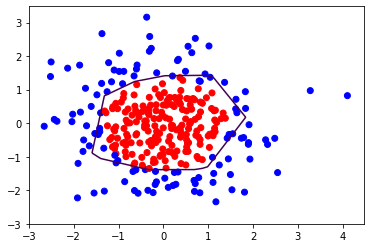

In [39]:

if __name__ =='__main__':
    backward()
        
        
    


In [5]:
def generate():
    seed= 2
    rmd = np.random.RandomState(seed)
    X=rmd.randn(300,2)
    
    Y_=[int(X0*X0+X1*X1<2) for (X0,X1) in X]
    
    Y_c=[['red' if y else 'blue'] for y in Y_]
    
    X=np.vstack(X).reshape(-1,2)
    
    Y_ = np.vstack(Y_).reshape(-1,1)
    
    return X,Y_,Y_c
a,b,c=generate()
print(b)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


In [32]:
X,Y_,Y_c = generate()
print(X)

[[-4.16757847e-01 -5.62668272e-02]
 [-2.13619610e+00  1.64027081e+00]
 [-1.79343559e+00 -8.41747366e-01]
 [ 5.02881417e-01 -1.24528809e+00]
 [-1.05795222e+00 -9.09007615e-01]
 [ 5.51454045e-01  2.29220801e+00]
 [ 4.15393930e-02 -1.11792545e+00]
 [ 5.39058321e-01 -5.96159700e-01]
 [-1.91304965e-02  1.17500122e+00]
 [-7.47870949e-01  9.02525097e-03]
 [-8.78107893e-01 -1.56434170e-01]
 [ 2.56570452e-01 -9.88779049e-01]
 [-3.38821966e-01 -2.36184031e-01]
 [-6.37655012e-01 -1.18761229e+00]
 [-1.42121723e+00 -1.53495196e-01]
 [-2.69056960e-01  2.23136679e+00]
 [-2.43476758e+00  1.12726505e-01]
 [ 3.70444537e-01  1.35963386e+00]
 [ 5.01857207e-01 -8.44213704e-01]
 [ 9.76147160e-06  5.42352572e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-1.86809065e+00  1.73118467e+00]
 [ 1.46767801e+00 -3.35677339e-01]
 [ 6.11340780e-01  4.79705919e-02]
 [-8.29135289e-01  8.77102184e-02]
 [ 1.00036589e+00 -3.81092518e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [ 4.33496330e-01  1.27837923e+00]
 [-6.34679305e-01  5

In [44]:
xx,yy=np.mgrid[-3:3:.5,-3:3:.5]
print(xx.ravel())

[-3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -2.5 -2.5
 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.  -2.  -2.  -2.
 -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -1.5 -1.5 -1.5 -1.5 -1.5 -1.5
 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
 -1.  -1.  -1.  -1.  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.5  1.5  1.5  1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  2.   2.   2.   2.   2.   2.
  2.   2.   2.   2.   2.   2.   2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5
  2.5  2.5  2.5  2.5]


In [42]:
print(yy)

[[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]]


In [43]:
grid = np.c_[xx.ravel(),yy.ravel()]
print(grid)

[[-3.  -3. ]
 [-3.  -2.5]
 [-3.  -2. ]
 [-3.  -1.5]
 [-3.  -1. ]
 [-3.  -0.5]
 [-3.   0. ]
 [-3.   0.5]
 [-3.   1. ]
 [-3.   1.5]
 [-3.   2. ]
 [-3.   2.5]
 [-2.5 -3. ]
 [-2.5 -2.5]
 [-2.5 -2. ]
 [-2.5 -1.5]
 [-2.5 -1. ]
 [-2.5 -0.5]
 [-2.5  0. ]
 [-2.5  0.5]
 [-2.5  1. ]
 [-2.5  1.5]
 [-2.5  2. ]
 [-2.5  2.5]
 [-2.  -3. ]
 [-2.  -2.5]
 [-2.  -2. ]
 [-2.  -1.5]
 [-2.  -1. ]
 [-2.  -0.5]
 [-2.   0. ]
 [-2.   0.5]
 [-2.   1. ]
 [-2.   1.5]
 [-2.   2. ]
 [-2.   2.5]
 [-1.5 -3. ]
 [-1.5 -2.5]
 [-1.5 -2. ]
 [-1.5 -1.5]
 [-1.5 -1. ]
 [-1.5 -0.5]
 [-1.5  0. ]
 [-1.5  0.5]
 [-1.5  1. ]
 [-1.5  1.5]
 [-1.5  2. ]
 [-1.5  2.5]
 [-1.  -3. ]
 [-1.  -2.5]
 [-1.  -2. ]
 [-1.  -1.5]
 [-1.  -1. ]
 [-1.  -0.5]
 [-1.   0. ]
 [-1.   0.5]
 [-1.   1. ]
 [-1.   1.5]
 [-1.   2. ]
 [-1.   2.5]
 [-0.5 -3. ]
 [-0.5 -2.5]
 [-0.5 -2. ]
 [-0.5 -1.5]
 [-0.5 -1. ]
 [-0.5 -0.5]
 [-0.5  0. ]
 [-0.5  0.5]
 [-0.5  1. ]
 [-0.5  1.5]
 [-0.5  2. ]
 [-0.5  2.5]
 [ 0.  -3. ]
 [ 0.  -2.5]
 [ 0.  -2. ]
 [ 0.  -1.5]
 [ 0.  -1. ]

# 神经网络基础

## 计算图

In [3]:
import tensorflow as tf

x=tf.constant([[1.0,2.0]])
w= tf.constant([[3.0],[4.0]])

y= tf.matmul(x,w)

print(y)
#只搭建计算过程，不计算

Tensor("MatMul_1:0", shape=(1, 1), dtype=float32)


## 会话

In [5]:
import tensorflow as tf

x=tf.constant([[1.0,2.0]])
w= tf.constant([[3.0],[4.0]])
y-tf.matmul(x,w)
with tf.Session() as sess:
    print(sess.run(y))
    
#回话可以计算图结果

[[11.]]


## 前向传播1

In [9]:
import tensorflow as tf

#定义输入和参数
x = tf.constant([[0.7,.5]])

w1=tf.Variable(tf.random_normal([2,3],stddev = 1,seed=1))
w2 = tf.Variable(tf.random_normal([3,1],stddev =  1,seed=1))

#定义前向传播过程
a=tf.matmul(x,w1)
y = tf.matmul(a,w2)

#用会话计算结果
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y))
    

[[3.0904665]]


## 前向传播2

In [10]:
import tensorflow as tf

#定义用户输入和输出
x= tf.placeholder(tf.float32,shape =(1,2))
w1= tf.Variable(tf.random_normal([2,3],stddev =1, seed =  1))
w2 = tf.Variable(tf.random_normal([3,1],stddev = 1,seed =  1))

#定义前向传播过程
a = tf.matmul(x,w1)
y = tf.matmul(a,w2)

#用会话计算结果
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(y,feed_dict={x:[[0.7,0.5]]}))


[[3.0904665]]


# 反向传播

In [22]:
import tensorflow as tf
import numpy as np
BATCH_SIZE =  8
seed = 23455

#给予随机种子生成随机数
rng =np.random.RandomState(seed)

X= rng.rand(32,2)

Y= [[int(X0+X1<1)] for (X0 ,X1) in X]
# print(X)
# print(Y)
#定义神经网络的输出，输入，前向传播过程
x= tf.placeholder(tf.float32,shape = (None,2))
y_ = tf.placeholder(tf.float32,shape = (None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev =  1,seed=1))
w2 =tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

a = tf.matmul(x,w1)
y=tf.matmul(a,w2)


#定义损失函数及反向传播方法

loss =  tf.reduce_mean(tf.square(y-y_))
train_step =tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# train_step =tf.train.MomentumOptimizer(0.001,0.9).minimize(loss)
# train_step =tf.train.AdamOptimizer(0.001).minimize(loss)

#生成回话，训练step轮
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    
    #输出目前未经训练的参数取值
    print(w1)
    print(w2)
    
    
    #训练模型
    STEPS =30000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 32
        end =start+BATCH_SIZE
        sess.run(train_step,feed_dict = {x:X[start:end],y_:Y[start:end]})
        if i%500 == 0:
            total_loss = sess.run(loss,feed_dict={x:X,y_:Y})
            print("After {}steps,loss on al data is{}".format(i,total_loss))
    print(sess.run(w1))


<tf.Variable 'Variable_20:0' shape=(2, 3) dtype=float32_ref>
<tf.Variable 'Variable_21:0' shape=(3, 1) dtype=float32_ref>
After 0steps,loss on al data is5.131181716918945
After 500steps,loss on al data is0.4291110038757324
After 1000steps,loss on al data is0.409789115190506
After 1500steps,loss on al data is0.39992278814315796
After 2000steps,loss on al data is0.39414557814598083
After 2500steps,loss on al data is0.39059656858444214
After 3000steps,loss on al data is0.3883358836174011
After 3500steps,loss on al data is0.386854887008667
After 4000steps,loss on al data is0.3858628571033478
After 4500steps,loss on al data is0.3851865231990814
After 5000steps,loss on al data is0.38471871614456177
After 5500steps,loss on al data is0.38439124822616577
After 6000steps,loss on al data is0.38415980339050293
After 6500steps,loss on al data is0.3839949369430542
After 7000steps,loss on al data is0.38387662172317505
After 7500steps,loss on al data is0.38379132747650146
After 8000steps,loss on al da